In [1]:
import numpy as np 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [2]:
batch_size=64
training_data=datasets.MNIST(
        root='data',
        train=True,
        download=True,
        transform=Compose([ToTensor(),Lambda(lambda x:torch.flatten(x))])
        )
train_dataloader=DataLoader(training_data,batch_size=batch_size)


In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.linear_Relu_stack=nn.Sequential(nn.Linear(784,128),
                                             nn.ReLU(),
                                             nn.Dropout(0.5),
                                             nn.Linear(128,784),
                                             nn.ReLU(),
                                            nn.Dropout(0.5))
        
                                             
    def forward(self,x):
        act_vals=self.linear_Relu_stack(x)
        return(act_vals)
model=Autoencoder()
print(model)

Autoencoder(
  (linear_Relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=784, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
  )
)


In [4]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)

In [5]:
def train(train_dataloader,model,loss_fn,optimizer):
    #size=len(dataloader.dataset)
    for batch,(X,y) in enumerate(train_dataloader):
        pred=model(X)
        loss=loss_fn(pred,X)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if(batch % 100==0):
            loss, current=loss.item(),batch*len(X)
            print(f"loss: {loss:>7f}")


In [10]:
epochs=10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 0.069146
loss: 0.074283
loss: 0.061604
loss: 0.086269
loss: 0.072438
loss: 0.075869
loss: 0.066451
loss: 0.064579
loss: 0.081332
loss: 0.067502
Epoch 2
-------------------------------
loss: 0.068569
loss: 0.074219
loss: 0.060727
loss: 0.085207
loss: 0.071085
loss: 0.075212
loss: 0.066146
loss: 0.063345
loss: 0.080743
loss: 0.067126
Epoch 3
-------------------------------
loss: 0.068102
loss: 0.075944
loss: 0.061231
loss: 0.086017
loss: 0.069877
loss: 0.076196
loss: 0.067538
loss: 0.064157
loss: 0.081334
loss: 0.067936
Epoch 4
-------------------------------
loss: 0.068621
loss: 0.073714
loss: 0.060335
loss: 0.084551
loss: 0.071077
loss: 0.076029
loss: 0.067595
loss: 0.065859
loss: 0.080364
loss: 0.066805
Epoch 5
-------------------------------
loss: 0.069678
loss: 0.074785
loss: 0.060828
loss: 0.084103
loss: 0.071353
loss: 0.075156
loss: 0.067242
loss: 0.064410
loss: 0.081452
loss: 0.067359
Epoch 6
-------------------------------
loss: 0.06

In [11]:

Mod_params=list(model.parameters())

In [12]:
weights_layer_1=Mod_params[0].detach().numpy()

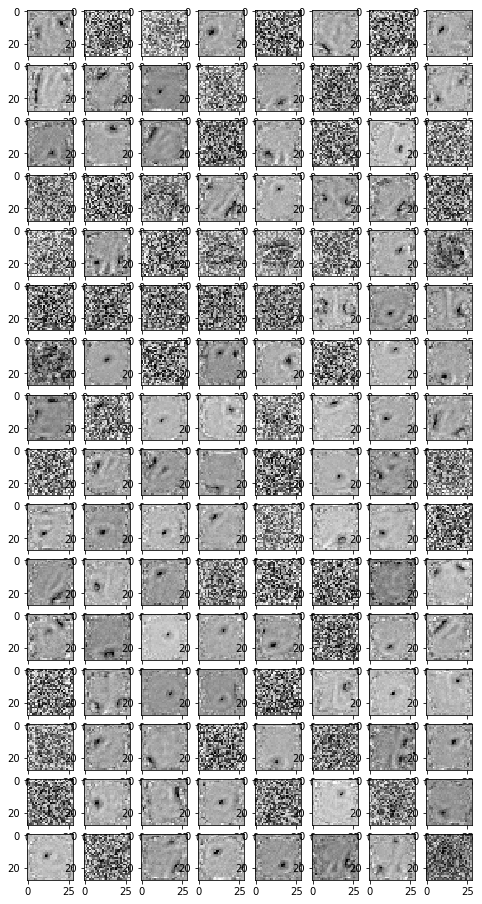

In [13]:
fig,ax=plt.subplots(16,8,figsize=[8,16])
k=0
for i in range(16):
    for j in range(8):
        ax[i,j].imshow(weights_layer_1[k,:].reshape(28,28),'gray')
        k=k+1